In [1]:
import logging
from dataclasses import dataclass
%load_ext autoreload
%autoreload 2

In [12]:
from astropy import units as u
from matplotlib import pyplot as plt
from diskchef.physics.williams_best import WB100auWithSmoothInnerGap
from diskchef import RadMCRTLines, Line, SciKitChemistry, logging_basic_config
from diskchef.maps.radmc_lines import RadMCRTLinesTraceTau, RadMCRTLinesTauSurf

logging_basic_config(level=logging.INFO)

06.28.2022 13:25:57 (     10143 ms) PID        957  diskchef.physics.base.WB100auWithSmoothInnerGap              INFO     Creating an instance of WB100auWithSmoothInnerGap
06.28.2022 13:25:58 (     10695 ms) PID        957  diskchef.engine.plot.Plot2D                                  INFO     Creating an instance of Plot2D
06.28.2022 13:25:59 (     11360 ms) PID        957  diskchef.engine.plot.Plot2D                                  INFO     Creating an instance of Plot2D


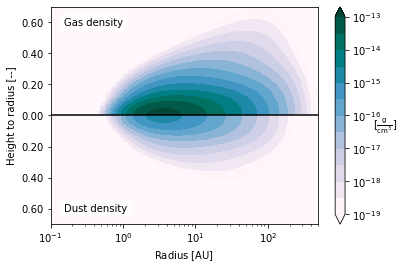

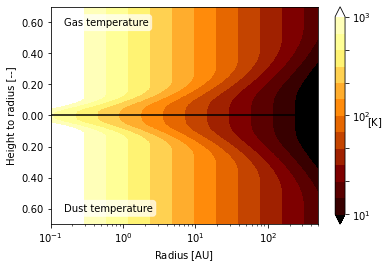

In [3]:
bins = 50
physics = WB100auWithSmoothInnerGap(star_mass=0.52 * u.solMass, radial_bins=bins, vertical_bins=bins,
                                    atmosphere_temperature_100au=40 * u.K, inner_radius=5 * u.au)
plt.figure()
physics.plot_density()
plt.figure()
physics.plot_temperatures();

06.28.2022 13:26:00 (     12772 ms) PID        957  diskchef.chemistry.base.SciKitChemistry                      INFO     Creating an instance of SciKitChemistry
06.28.2022 13:26:00 (     12788 ms) PID        957  py.warnings                                                  WARNING  /home/smirnov/anaconda3/envs/latest/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator QuantileTransformer from version 0.23.2 when using version 1.0.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(

06.28.2022 13:26:00 (     12843 ms) PID        957  py.warnings                                                  WARNING  /home/smirnov/anaconda3/envs/latest/lib/python3.8/site-packages/sklearn/base.py:324: UserWarning: Trying to unpickle estimator KNeighborsRegressor from version 0.23.2 when using

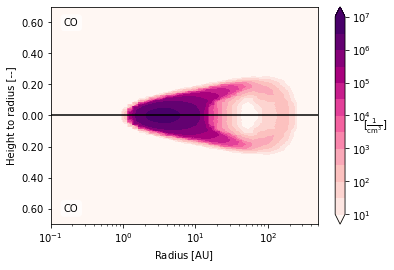

In [4]:
chemistry = SciKitChemistry(physics=physics)
chemistry.run_chemistry()
chemistry.plot_absolute_chemistry("CO");

In [5]:
rt = RadMCRTLines(chemistry=chemistry, line_list=[Line(name='CO J=3-2', transition=3, molecule='CO')])
rt.create_files(channels_per_line=33, window_width=5 * u.km / u.s)
rt.run(inclination=35.18 * u.deg, position_angle=79.19 * u.deg, distance=128 * u.pc, )

06.28.2022 13:26:01 (     13875 ms) PID        957  diskchef.lamda.line.Line(CO J=3-2)                           INFO     Creating an instance of Line
06.28.2022 13:26:01 (     13877 ms) PID        957  diskchef.lamda.line.Line(CO J=3-2)                           INFO     Found LAMDA file: /mnt/d/astrowork/diskchef/diskchef/lamda/files/co.dat
06.28.2022 13:26:01 (     13902 ms) PID        957  diskchef.maps.base.RadMCRTLines                              INFO     Creating an instance of RadMCRTLines
06.28.2022 13:26:01 (     13940 ms) PID        957  diskchef.maps.base.RadMCRTLines                              WARNING  Directory radmc already exists! The results can be biased.
06.28.2022 13:26:01 (     13986 ms) PID        957  diskchef.maps.base.RadMCRTLines                              INFO     Files written to radmc
06.28.2022 13:26:01 (     14098 ms) PID        957  diskchef.maps.base.RadMCRTLines                              INFO     Line files written to radmc
06.28.2022 13:26:02 

[<Figure size 360x360 with 17 Axes>]

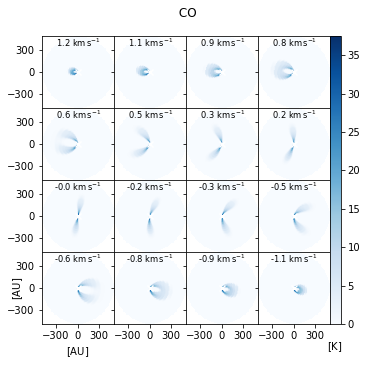

In [6]:
rt.channel_maps();

In [7]:
rttau = RadMCRTLinesTraceTau(chemistry=chemistry, line_list=[Line(name='CO J=3-2', transition=3, molecule='CO')], folder="radmc_tau")
rttau.create_files(channels_per_line=33, window_width=5 * u.km / u.s)
rttau.run(inclination=35.18 * u.deg, position_angle=79.19 * u.deg, distance=128 * u.pc, )

06.28.2022 13:26:08 (     20347 ms) PID        957  diskchef.lamda.line.Line(CO J=3-2)                           INFO     Creating an instance of Line
06.28.2022 13:26:08 (     20348 ms) PID        957  diskchef.lamda.line.Line(CO J=3-2)                           INFO     Found LAMDA file: /mnt/d/astrowork/diskchef/diskchef/lamda/files/co.dat
06.28.2022 13:26:08 (     20368 ms) PID        957  diskchef.maps.base.RadMCRTLinesTraceTau                      INFO     Creating an instance of RadMCRTLinesTraceTau
06.28.2022 13:26:08 (     20369 ms) PID        957  diskchef.maps.base.RadMCRTLinesTraceTau                      WARNING  Directory radmc_tau already exists! The results can be biased.
06.28.2022 13:26:08 (     20418 ms) PID        957  diskchef.maps.base.RadMCRTLinesTraceTau                      INFO     Files written to radmc_tau
06.28.2022 13:26:08 (     20536 ms) PID        957  diskchef.maps.base.RadMCRTLinesTraceTau                      INFO     Line files written to radmc_tau


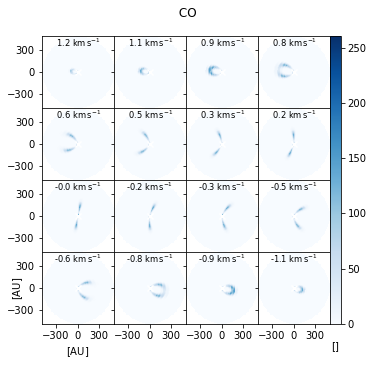

In [9]:
rttau.channel_maps();

06.28.2022 14:07:49 (   2521501 ms) PID        957  diskchef.lamda.line.Line(CO J=3-2)                           INFO     Creating an instance of Line
06.28.2022 14:07:49 (   2521502 ms) PID        957  diskchef.lamda.line.Line(CO J=3-2)                           INFO     Found LAMDA file: /mnt/d/astrowork/diskchef/diskchef/lamda/files/co.dat
06.28.2022 14:07:49 (   2521521 ms) PID        957  diskchef.maps.base.RadMCRTLinesTauSurf                       INFO     Creating an instance of RadMCRTLinesTauSurf
06.28.2022 14:07:49 (   2521523 ms) PID        957  diskchef.maps.base.RadMCRTLinesTauSurf                       WARNING  Directory radmc_tau1 already exists! The results can be biased.
06.28.2022 14:07:49 (   2521563 ms) PID        957  diskchef.maps.base.RadMCRTLinesTauSurf                       INFO     Files written to radmc_tau1
06.28.2022 14:07:49 (   2521663 ms) PID        957  diskchef.maps.base.RadMCRTLinesTauSurf                       INFO     Line files written to radmc_tau

[<Figure size 360x360 with 17 Axes>]

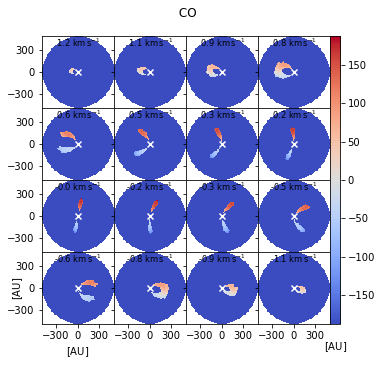

In [15]:
rttau1 = RadMCRTLinesTauSurf(chemistry=chemistry, line_list=[Line(name='CO J=3-2', transition=3, molecule='CO')], folder="radmc_tau1", tau=1)
rttau1.create_files(channels_per_line=33, window_width=5 * u.km / u.s)
rttau1.run(inclination=35.18 * u.deg, position_angle=79.19 * u.deg, distance=128 * u.pc, )
rttau1.channel_maps()

06.28.2022 14:08:39 (   2571167 ms) PID        957  diskchef.lamda.line.Line(CO J=3-2)                           INFO     Creating an instance of Line
06.28.2022 14:08:39 (   2571168 ms) PID        957  diskchef.lamda.line.Line(CO J=3-2)                           INFO     Found LAMDA file: /mnt/d/astrowork/diskchef/diskchef/lamda/files/co.dat
06.28.2022 14:08:39 (   2571187 ms) PID        957  diskchef.maps.base.RadMCRTLinesTauSurf                       INFO     Creating an instance of RadMCRTLinesTauSurf
06.28.2022 14:08:39 (   2571231 ms) PID        957  diskchef.maps.base.RadMCRTLinesTauSurf                       INFO     Files written to radmc_tau1_flat
06.28.2022 14:08:39 (   2571331 ms) PID        957  diskchef.maps.base.RadMCRTLinesTauSurf                       INFO     Line files written to radmc_tau1_flat
06.28.2022 14:08:39 (   2571356 ms) PID        957  diskchef.maps.base.RadMCRTLinesTauSurf                       INFO     Running radmc3d
06.28.2022 14:08:39 (   2571357 ms) 

[<Figure size 360x360 with 17 Axes>]

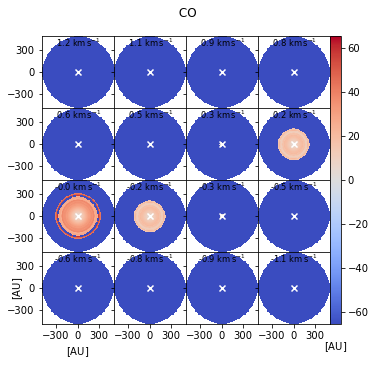

In [16]:
rttau1 = RadMCRTLinesTauSurf(chemistry=chemistry, line_list=[Line(name='CO J=3-2', transition=3, molecule='CO')], folder="radmc_tau1_flat", tau=1)
rttau1.create_files(channels_per_line=33, window_width=5 * u.km / u.s)
rttau1.run(inclination=0 * u.deg, position_angle=0 * u.deg, distance=128 * u.pc, )
rttau1.channel_maps()